# <center>Curso de Modelagem de Dados para IA - PARTE 16</center>

<img src="img/image.jpg" alt="Drawing" style="width: 300px;"/>


## Visualizar resumos de dados sobre Incêndio Florestal
Nesta seção, mostramos mais alguns exemplos de visualizações, combinados com várias operações de processamento de dados, que podem fornecer informações adicionais sobre os dados. Nós nos concentramos nas caracterizações dos dados históricos de incêndios florestais.

Tamanhos e durações de incêndios florestais
O conjunto de dados brutos de incêndios florestais continha informações sobre os tamanhos estimados de incêndios (<span style="font-family: 'Courier'">GIS_ACRES</span> = número de acres queimados) e aumentamos esse conjunto de dados para adicionar informações adicionais sobre a duração temporal dos incêndios. Os histogramas são uma maneira útil de resumir as distribuições de tamanhos e durações de incêndios. O módulo <span style="font-family: 'Courier'">pyplot</span> no matplotlib fornece uma função para plotar histogramas (que usa a função histogram do numpy para fazer o cálculo), bem como muitas outras funções para configurar layouts de plotagem, rótulos, etc. No código abaixo, criamos um painel de dois subpainéis para examinar as distribuições de tamanho e duração.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df16 = pd.read_excel('data/wildfires/Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'], 
                   converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
df17 = pd.read_excel('data/wildfires/Fires_100.xlsx', sheet_name='2017', na_values=['<Null>'], 
                   converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
df17.rename(columns={'YEAR_': 'YEAR'}, inplace=True)
dffires = pd.concat((df16, df17), axis=0)
dffires['DURATION'] = (dffires['CONT_DATE'] - dffires['ALARM_DATE']).dt.days
dffires = dffires[(dffires.DURATION >= 0) & (dffires.DURATION < 3000)]

Text(0, 0.5, 'P(DURATION)')

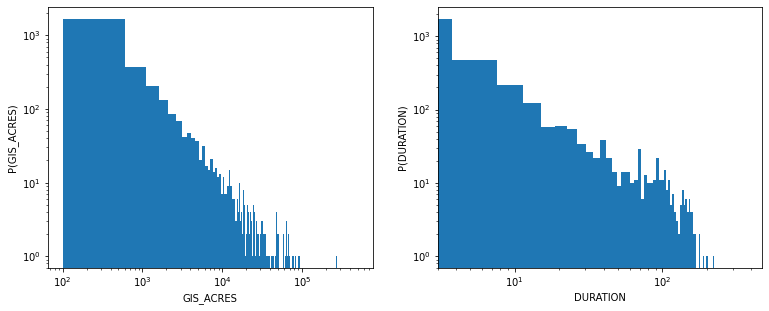

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12.8,4.8])
plt.subplot(1,2,1)
plt.hist(dffires.GIS_ACRES, bins=1000)
plt.loglog()
plt.xlabel('GIS_ACRES'); plt.ylabel('P(GIS_ACRES)')
plt.subplot(1,2,2)
plt.hist(dffires.DURATION, bins=100)
plt.loglog()
plt.xlabel('DURATION'); plt.ylabel('P(DURATION)')

Como os tamanhos e durações dos incêndios estão espalhados por uma ampla faixa de valores, é útil neste caso traçar suas distribuições em uma escala log-log (<span style="font-family: 'Courier'">plt.loglog()</span>. O fato de que esses histogramas revelam uma relação aproximadamente linear em uma escala log-log indica uma relação de lei de potência nas próprias distribuições.Uma distribuição de lei de potência de tamanhos de incêndios foi investigada em modelos simples de dinâmica de incêndios florestais.

Podemos esperar algum tipo de correlação entre duração e tamanho, ou seja, que incêndios maiores provavelmente tendem a durar mais. Podemos dar uma olhada em sua relação com um gráfico de dispersão:

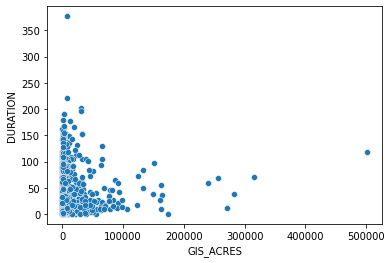

In [7]:
sns.scatterplot(data = dffires, x = 'GIS_ACRES', y='DURATION')
plt.savefig('duration_vs_size.png')

Não está muito claro se há ou não muita correlação entre tamanho e duração nos dados históricos. No entanto, é possível obter um pouco mais de informações sobre os dados, incluindo uma camada diferente de dados em nosso gráfico. Especificamente, podemos repetir o gráfico de dispersão, mas colorir cada ponto identificando cada AGÊNCIA responsável por lidar com o respectivo incêndio. O fato de que os tamanhos e durações dos incêndios parecem agrupar-se um pouco com base na agência ciente sugere que pode haver diferentes práticas de gerenciamento ou políticas de supressão usadas por diferentes agências que estão contribuindo para a dispersão dos dados.

<AxesSubplot:xlabel='GIS_ACRES', ylabel='DURATION'>

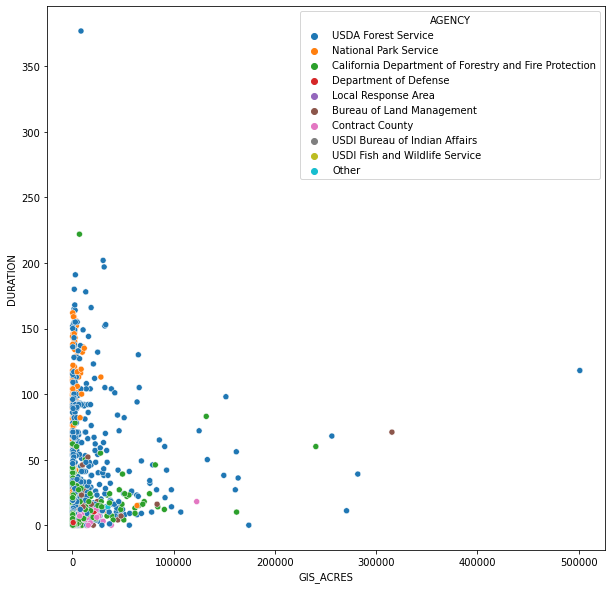

In [8]:
plt.figure(figsize=(10,10))
# make a scatterplot of DURATION vs GIS_ACRES, and color each point by AGENCY
sns.scatterplot(data=dffires, x='GIS_ACRES', y='DURATION', hue='AGENCY')